# IMPORTS

In [981]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, matthews_corrcoef

# PREPROCESSING
Importing dataset

In [982]:
drugdf = pd.read_csv('drug_classification.csv')

Printing head

In [983]:
print(drugdf.head(10))

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
5   22   F  NORMAL        HIGH    8.607  drugX
6   49   F  NORMAL        HIGH   16.275  DrugY
7   41   M     LOW        HIGH   11.037  drugC
8   60   M  NORMAL        HIGH   15.171  DrugY
9   43   M     LOW      NORMAL   19.368  DrugY


Getting more info

In [984]:
drugdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Getting statistics info

In [985]:
drugdf.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Checking nulls in dataset

In [986]:
drugdf.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Checking unique values of categorical data

In [987]:
for col in drugdf.select_dtypes(include=['object']).columns:
    print(f'Column - {col} - unique values: {drugdf[col].unique()}')

Column - Sex - unique values: ['F' 'M']
Column - BP - unique values: ['HIGH' 'LOW' 'NORMAL']
Column - Cholesterol - unique values: ['HIGH' 'NORMAL']
Column - Drug - unique values: ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


Handling categorical data

In [988]:
cols_labelencoder = ['BP', 'Cholesterol', 'Drug']

encoders = {}
encoded_data = {}

for col in cols_labelencoder:
    encoder = LabelEncoder().fit(drugdf[col])
    encoders[col] = encoder
    encoded_data[col] = encoder.transform(drugdf[col])

for col in cols_labelencoder:
    drugdf[col] = encoded_data[col]

In [989]:
drugdf['Sex'] = pd.get_dummies(drugdf['Sex'], drop_first=True).astype(int)
drugdf = drugdf.rename(columns={'Sex':'Male'})

# VISUALIZING
Drug type count

Drug
0    91
4    54
1    23
3    16
2    16
Name: count, dtype: int64


Text(0.5, 0, 'Drug type')

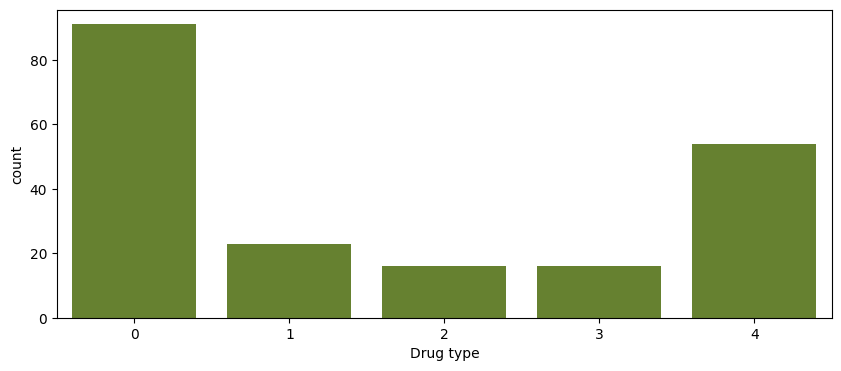

In [990]:
print(drugdf['Drug'].value_counts())
plt.figure(figsize=(10,4))
sns.countplot(data=drugdf, x='Drug', color='olivedrab')
plt.xlabel('Drug type')

Balancing data

In [991]:
filtered_drugdf = drugdf[~drugdf['Drug'].isin([3, 2])]
drugdf_final = filtered_drugdf.groupby('Drug').apply(lambda x: x.sample(n=23, random_state=42)).reset_index(drop=True)

In [992]:
drugdf_final = pd.concat([drugdf_final, drugdf[drugdf['Drug'].isin([3, 2])]])

Male count

Text(0.5, 0, 'Male')

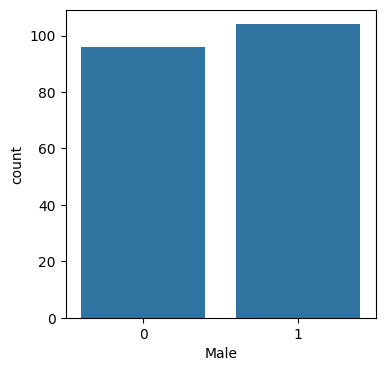

In [993]:
plt.figure(figsize=(4,4))
sns.countplot(data=drugdf, x='Male')
plt.xlabel('Male')

Correlation map

<Axes: >

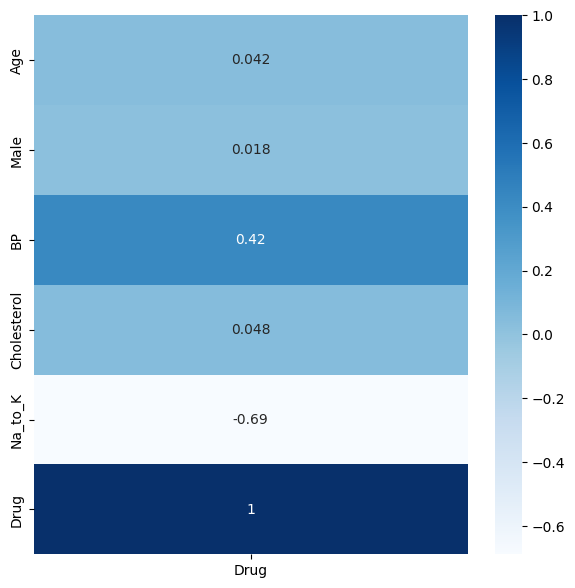

In [994]:
plt.figure(figsize=(7,7))
sns.heatmap(data=drugdf.corr()['Drug'].to_frame(), annot=True, cmap='Blues')

# AI
Data separation

In [995]:
X = drugdf_final[['Age', 'Male', 'BP', 'Cholesterol']]
y = drugdf_final['Drug']

In [996]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [997]:
lr = LogisticRegression(max_iter=1000)

In [998]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [999]:
predictions = lr.predict(X_test)

In [1000]:
print('Classification Report:')
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.88      1.00      0.93         7
           2       0.60      1.00      0.75         3
           3       0.00      0.00      0.00         0
           4       0.80      0.80      0.80         5

    accuracy                           0.76        21
   macro avg       0.66      0.63      0.60        21
weighted avg       0.85      0.76      0.75        21



c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [1001]:
print(f'Matthews Correlation Coefficient: {matthews_corrcoef(y_test, predictions):.2f}')

Matthews Correlation Coefficient: 0.71
